<class 'pandas.core.frame.DataFrame'>
Int64Index: 158731 entries, 0 to 158730
Data columns (total 34 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   # Date and time                             158731 non-null  datetime64[ns]
 1   1_Wind speed (m/s)                          158731 non-null  float64       
 2   1_Wind direction (°)                        158731 non-null  float64       
 3   1_Nacelle position (°)                      158731 non-null  float64       
 4   1_Power (kW)                                158731 non-null  float64       
 5   1_Reactive power (kvar)                     158731 non-null  float64       
 6   1_Front bearing temperature (°C)            158731 non-null  float64       
 7   1_Rear bearing temperature (°C)             158731 non-null  float64       
 8   1_Stator temperature 1 (°C)                 158731 non-null  float64      

/var/folders/wh/srwjqw_j5gsbl1y7xdb9jc900000gn/T/ipykernel_1980/1412645467.py:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_train = train.corr()
/var/folders/wh/srwjqw_j5gsbl1y7xdb9jc900000gn/T/ipykernel_1980/1412645467.py:37: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_test = test.corr()


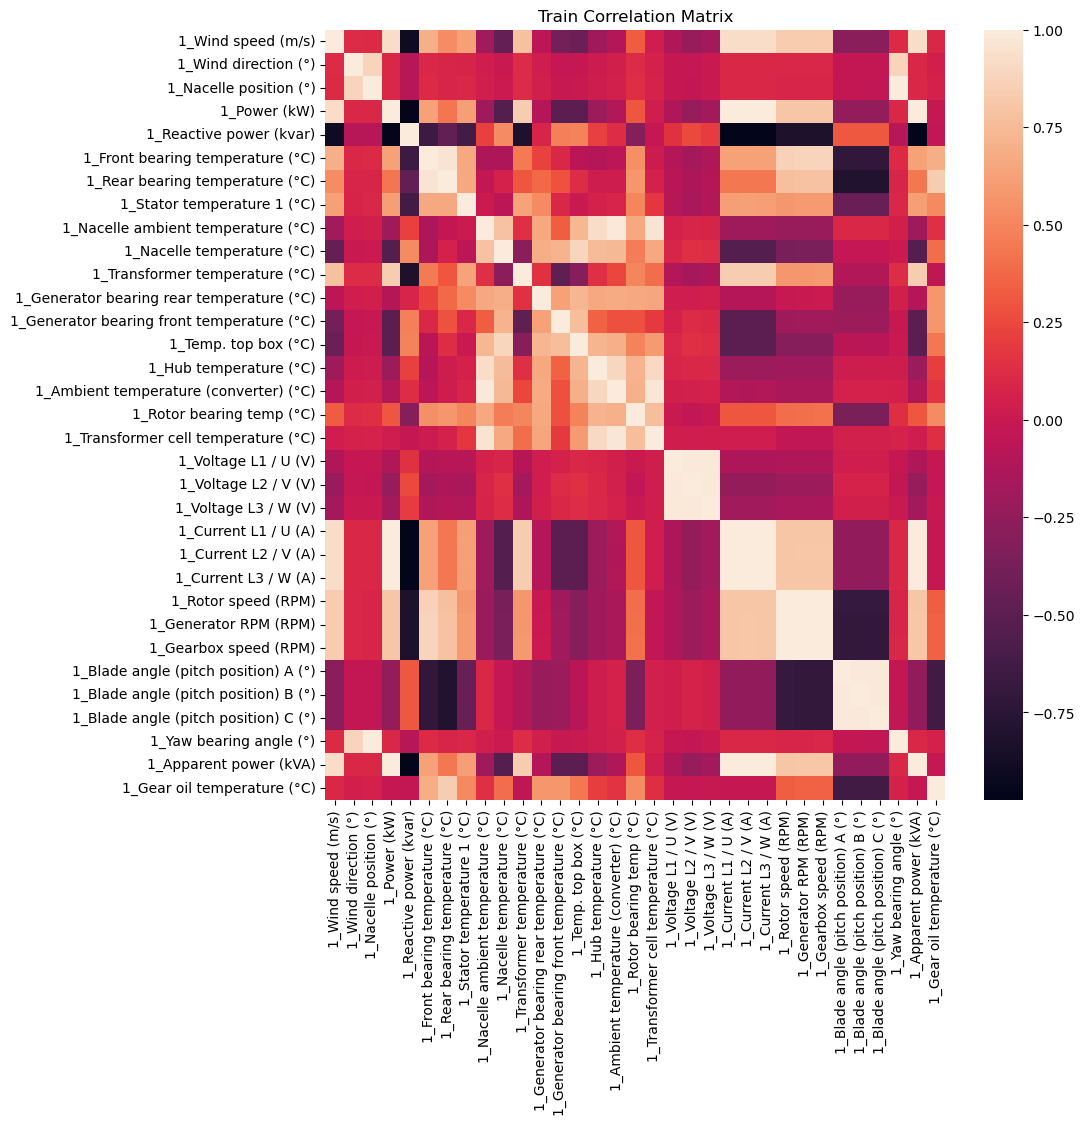

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
X_train = pd.read_csv('data/single_turbine_data/X_train.csv')
X_test = pd.read_csv('data/single_turbine_data/X_test.csv')
y_train = pd.read_csv('data/single_turbine_data/y_train.csv')
y_test = pd.read_csv('data/single_turbine_data/y_test.csv')

# convert to datetime
X_train['# Date and time'] = pd.to_datetime(X_train['# Date and time'])
X_test['# Date and time'] = pd.to_datetime(X_test['# Date and time'])
y_train['# Date and time'] = pd.to_datetime(y_train['# Date and time'])
y_test['# Date and time'] = pd.to_datetime(y_test['# Date and time'])

# Setting the index
# X_train.set_index('# Date and time', inplace=True)
# X_test.set_index('# Date and time', inplace=True)
# y_train.set_index('# Date and time', inplace=True)
# y_test.set_index('# Date and time', inplace=True)

# Merging X and y
train = pd.merge(X_train, y_train, on='# Date and time')
test = pd.merge(X_test, y_test, on='# Date and time')

# Data overview
print(train.info())
print(test.info())

# Descriptive statistics
print(train.describe())
print(test.describe())

# Correlation analysis
corr_train = train.corr()
corr_test = test.corr()

# Heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_train, ax=ax)
plt.title('Train Correlation Matrix')
plt.show()


It looks like we have a strong correlation between some temperatures and also the pitch angles. Nacelle temperature does not correlate well, likely due to the fan cooling the nacelle.

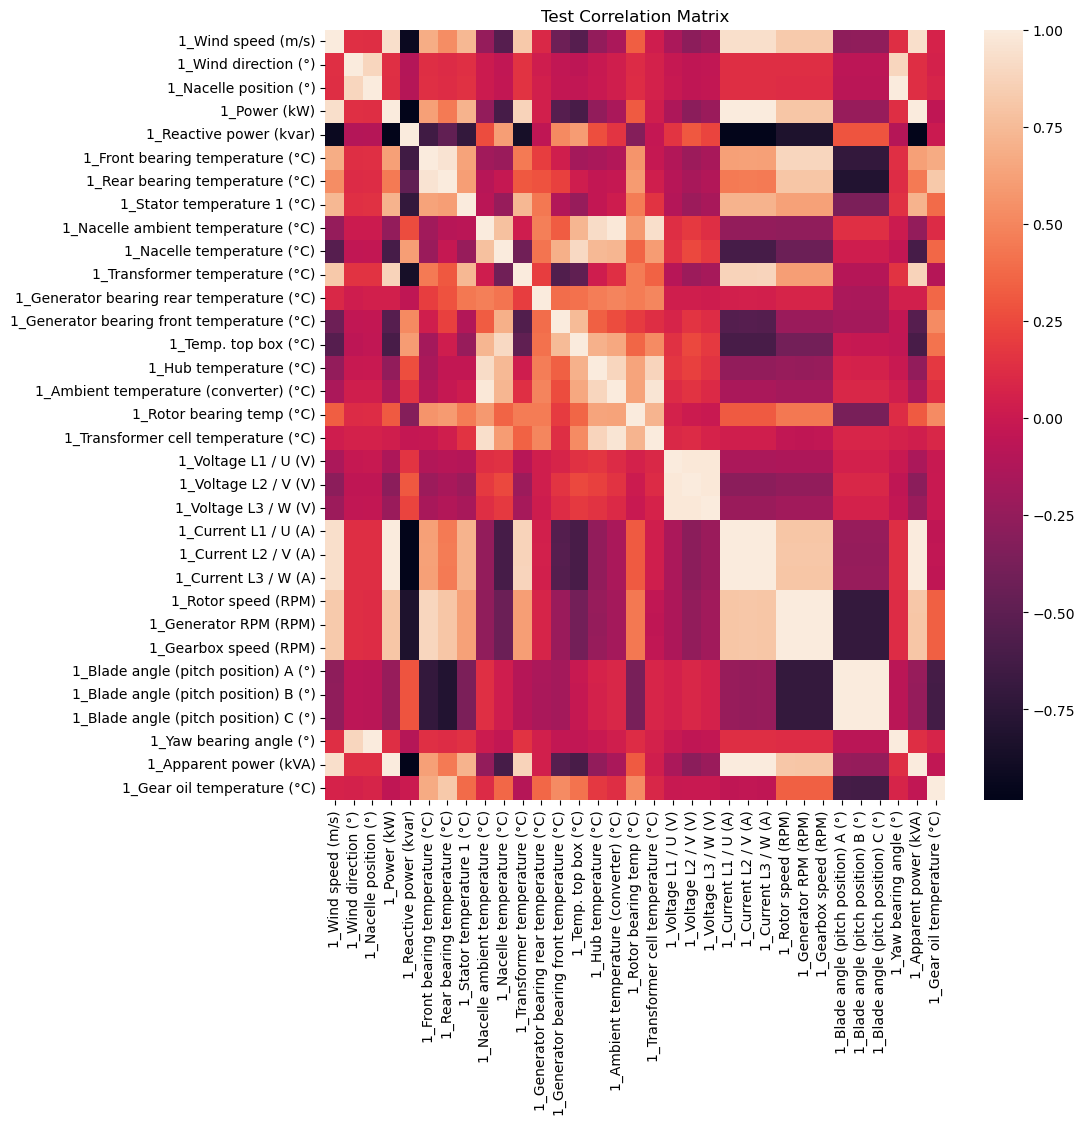

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_test, ax=ax)
plt.title('Test Correlation Matrix')
plt.show()

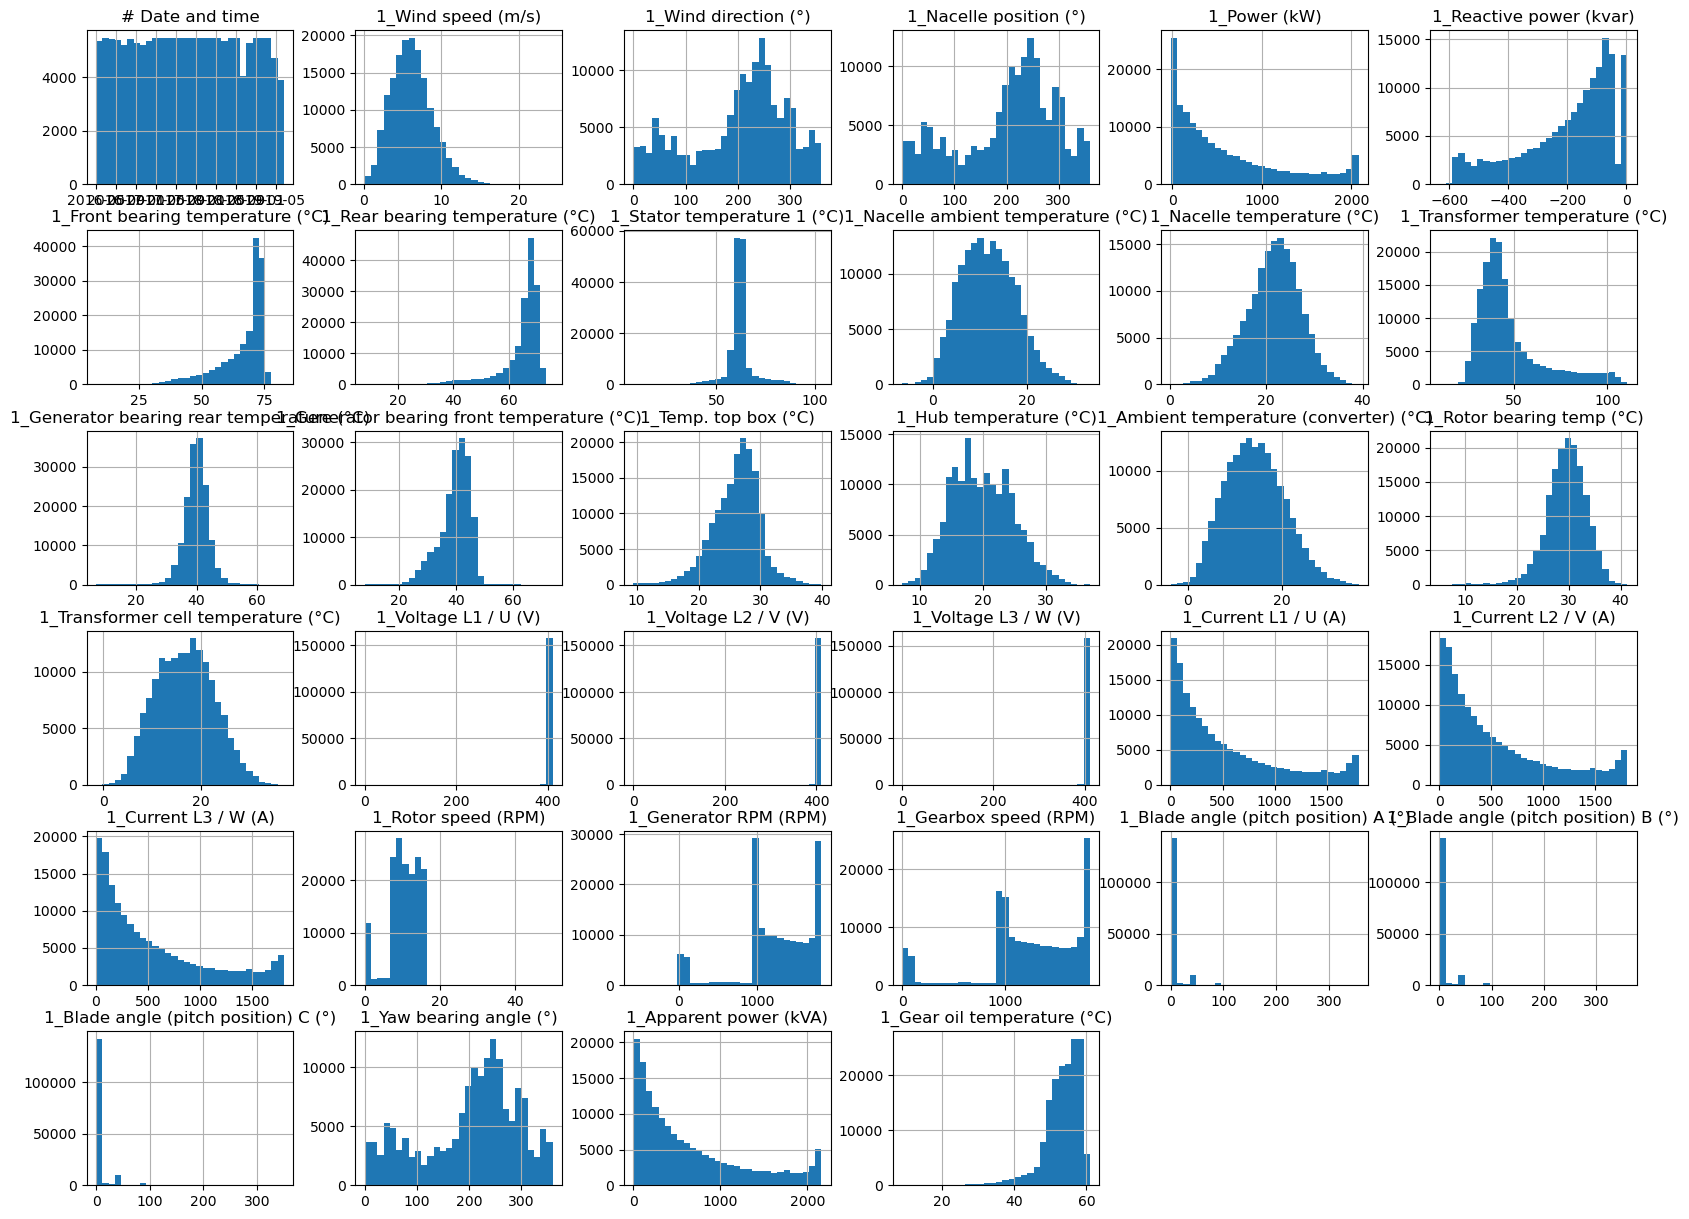

In [17]:

# Histograms for all variables in the dataframe
train.hist(bins=30, figsize=(20,15))
plt.show()


We will want to drop everything in the zero active power bin. Or if we include it we may just need a bigger bodel.

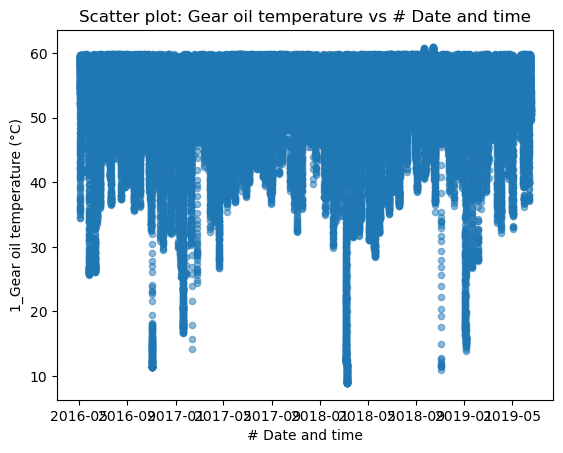

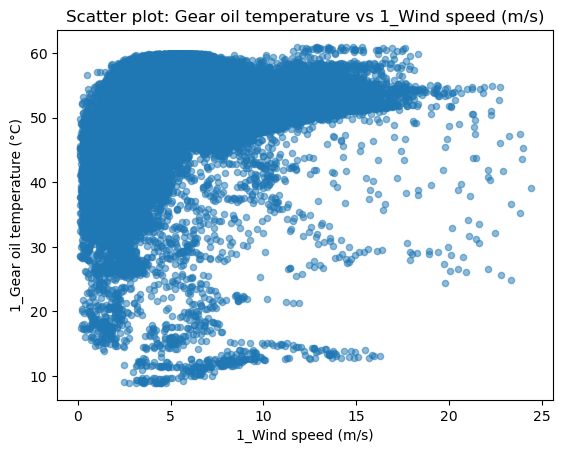

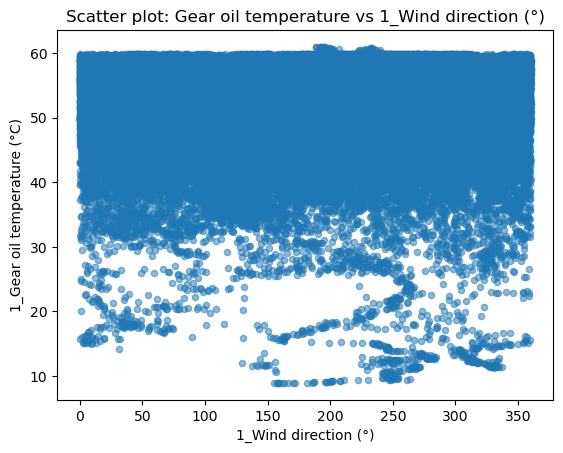

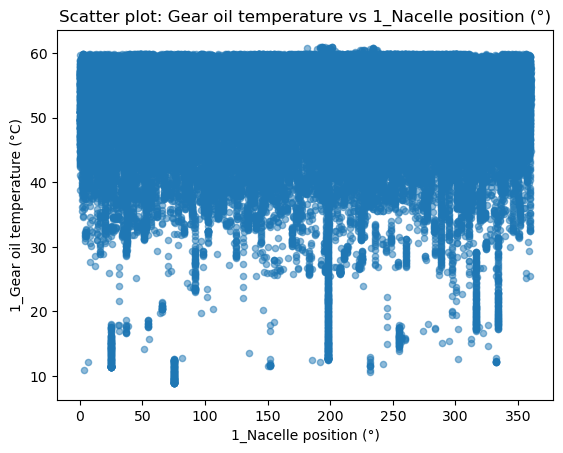

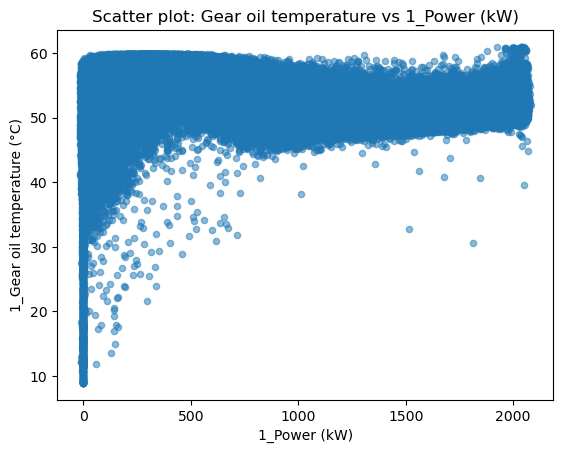

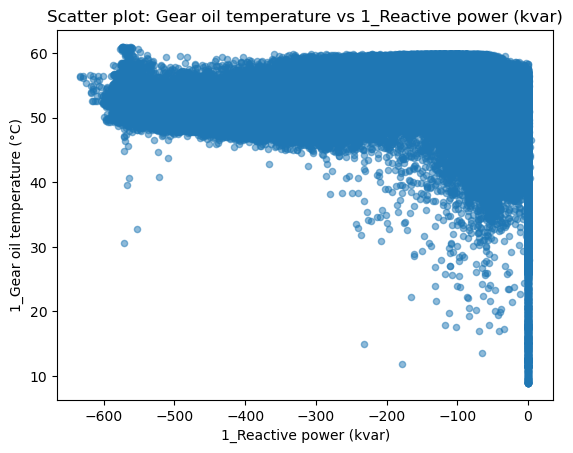

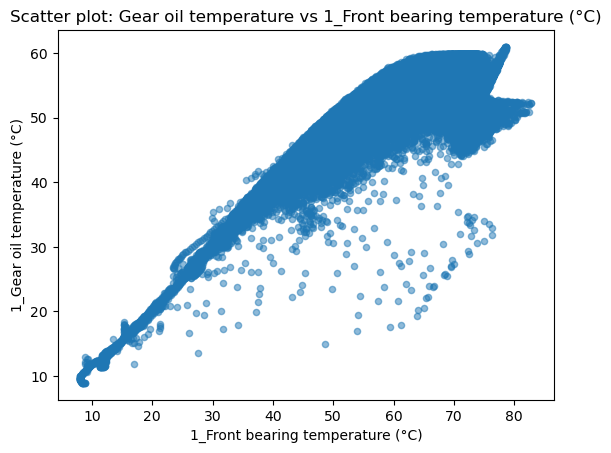

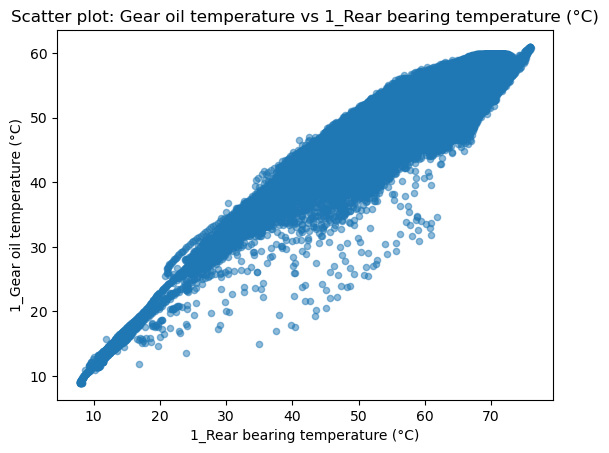

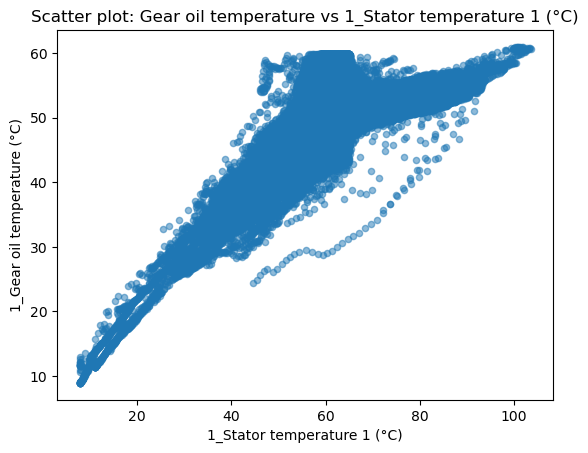

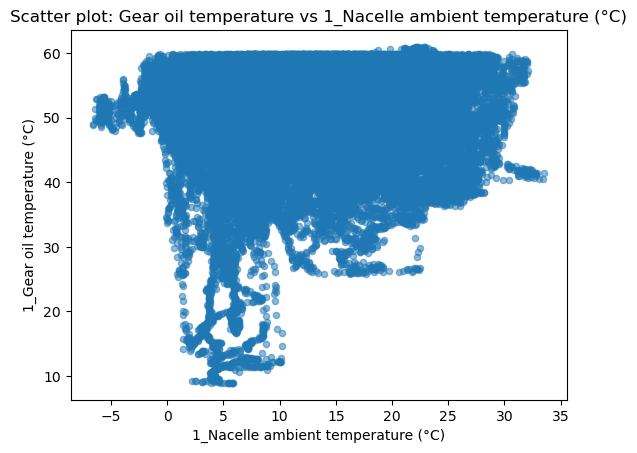

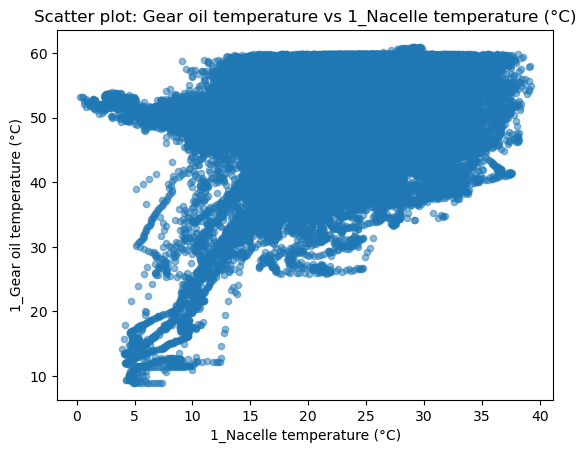

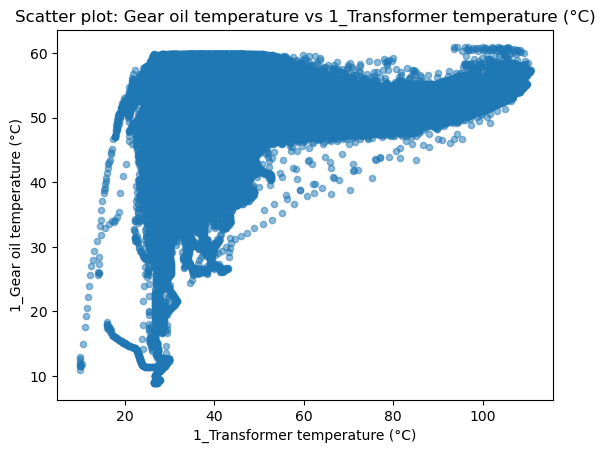

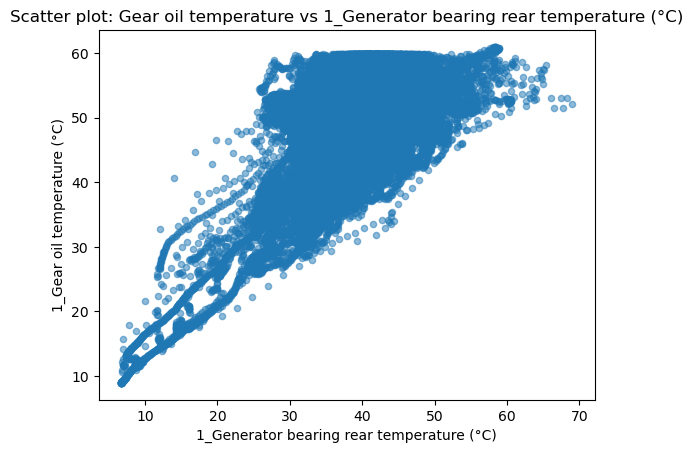

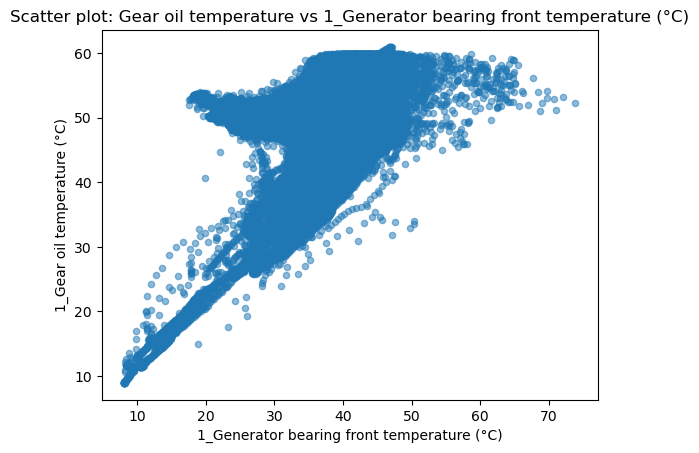

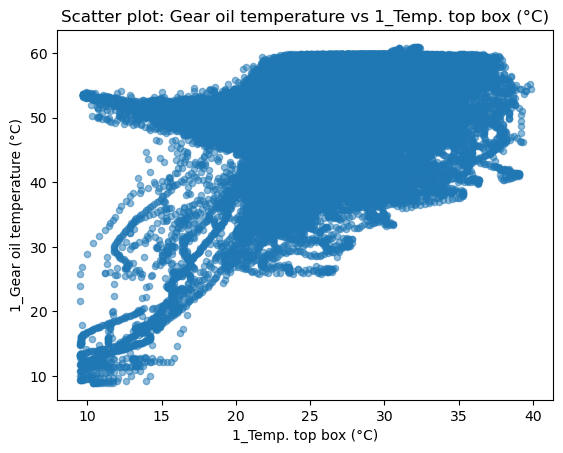

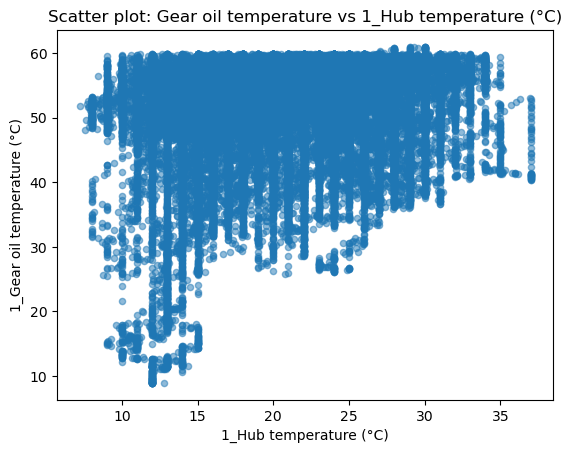

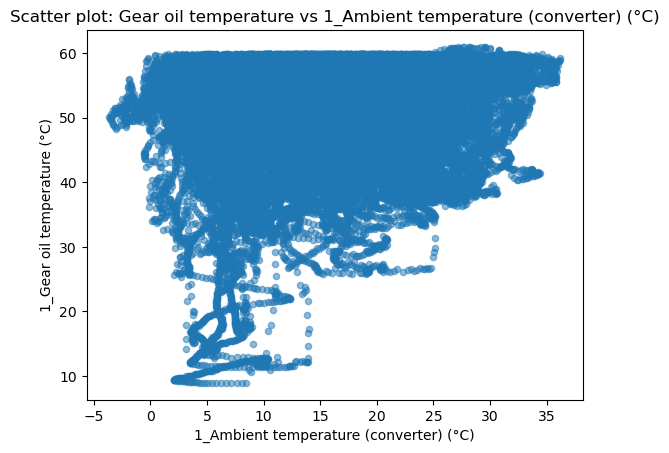

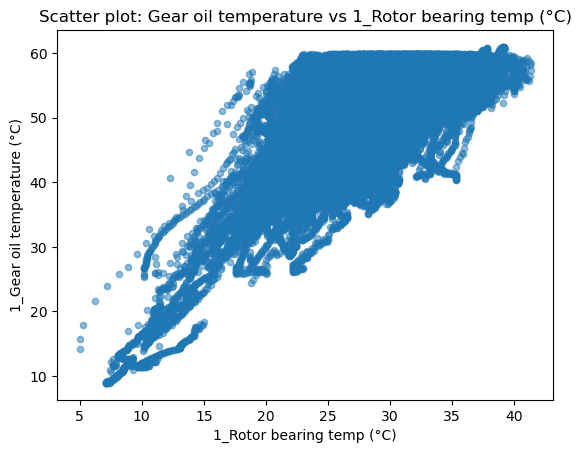

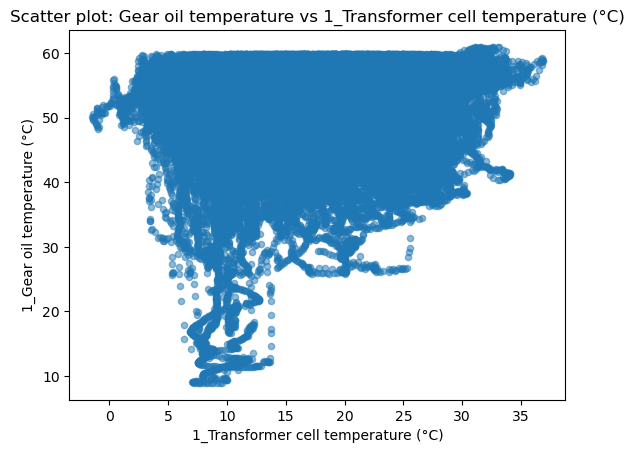

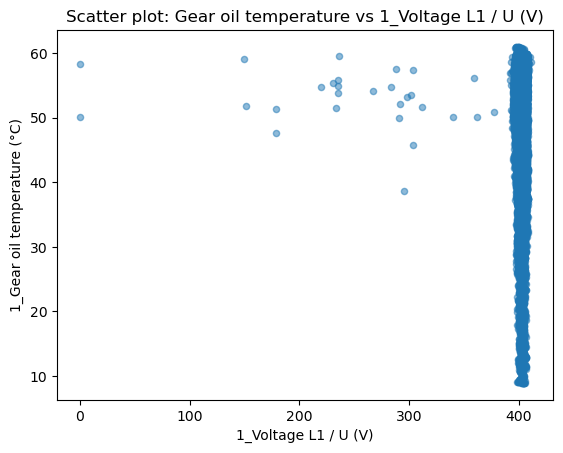

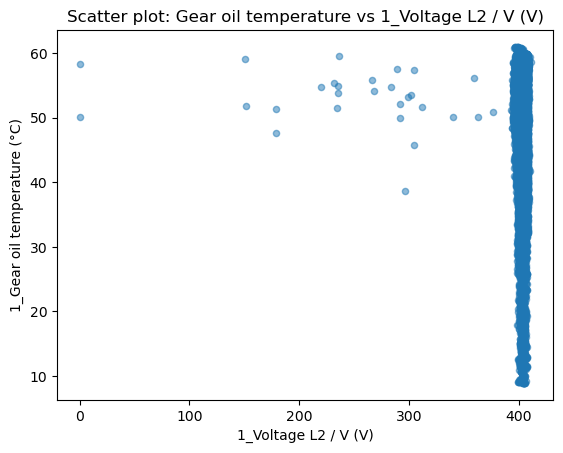

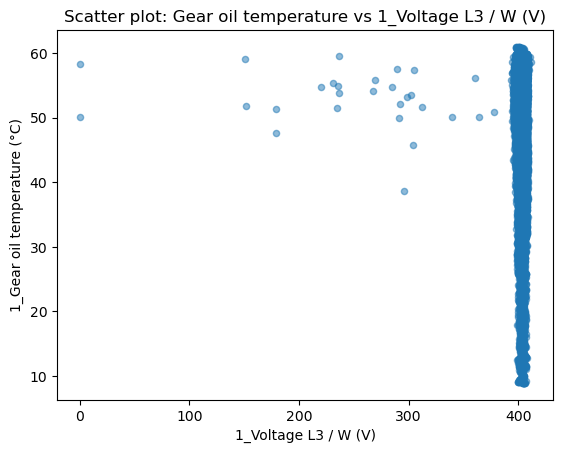

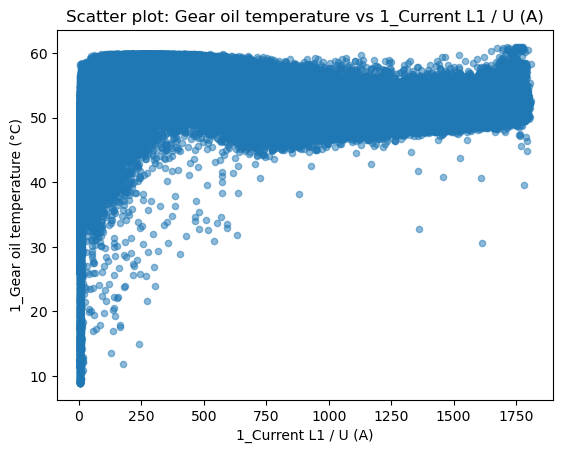

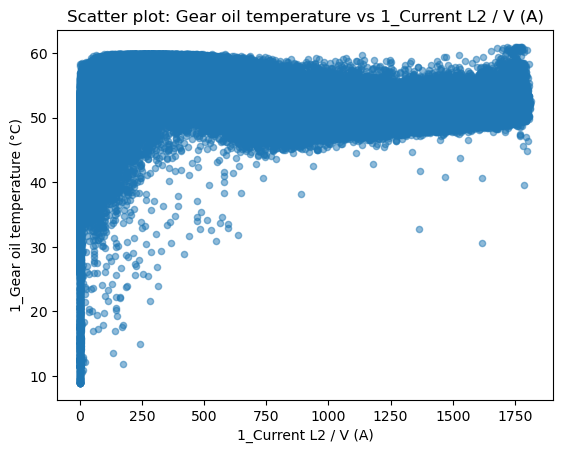

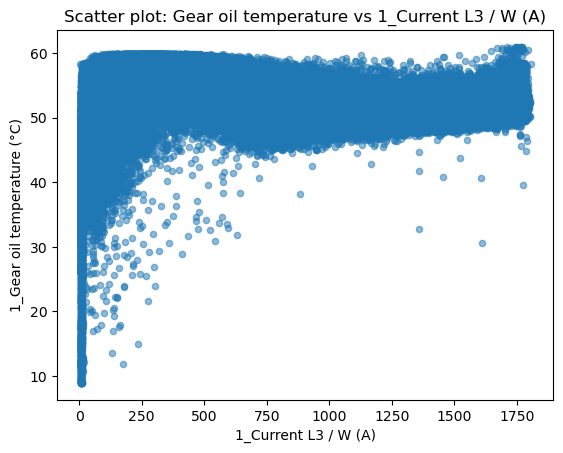

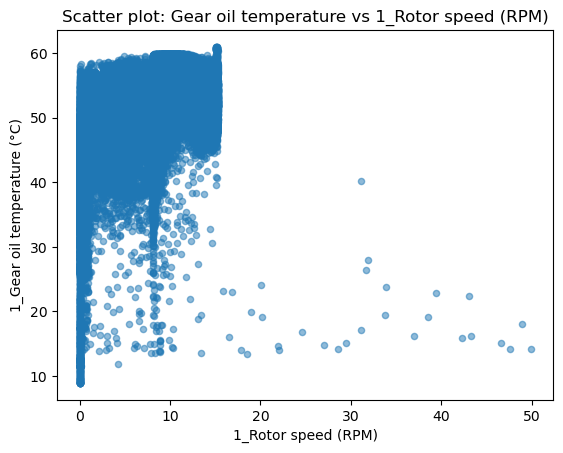

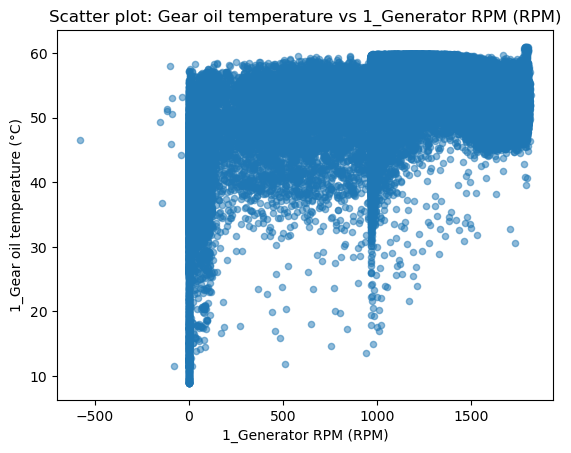

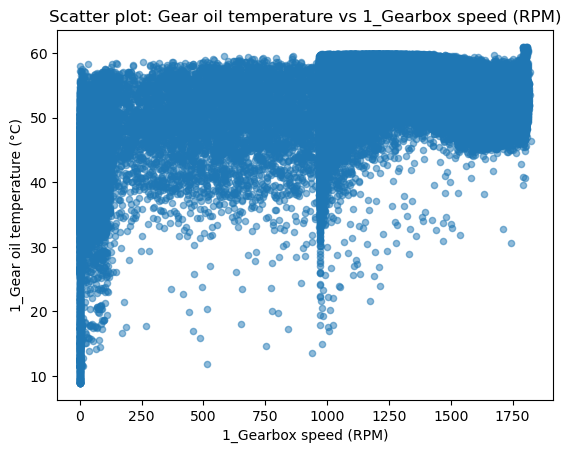

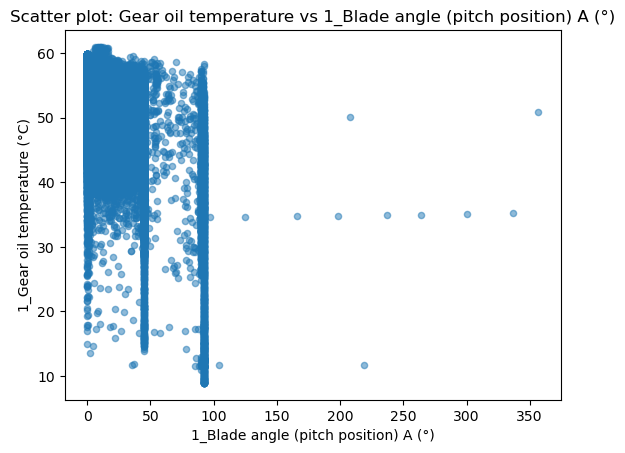

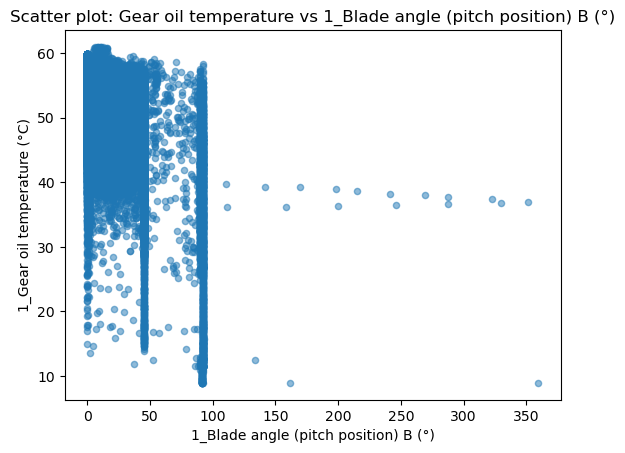

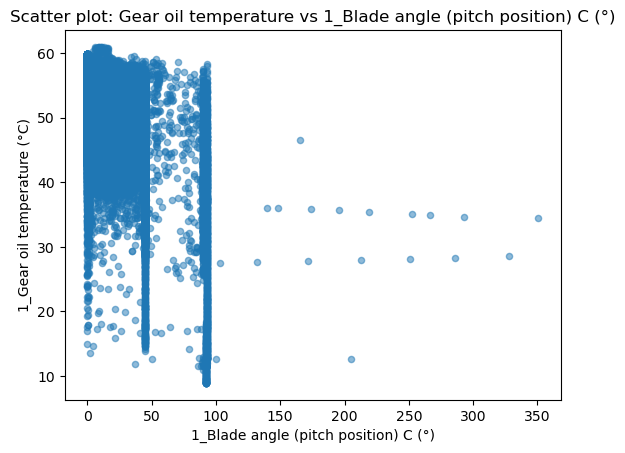

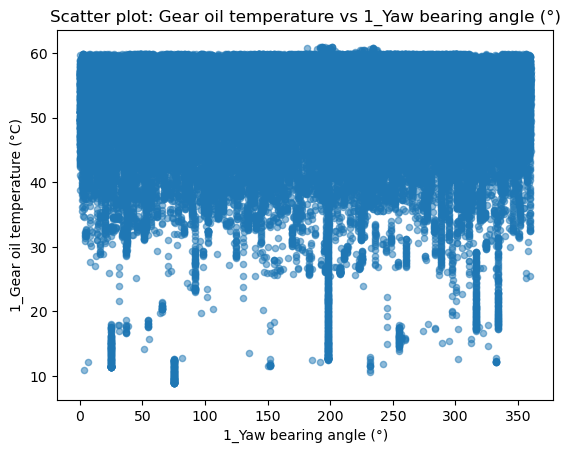

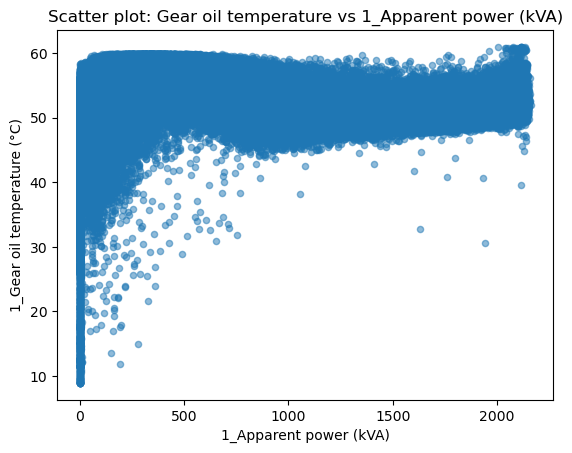

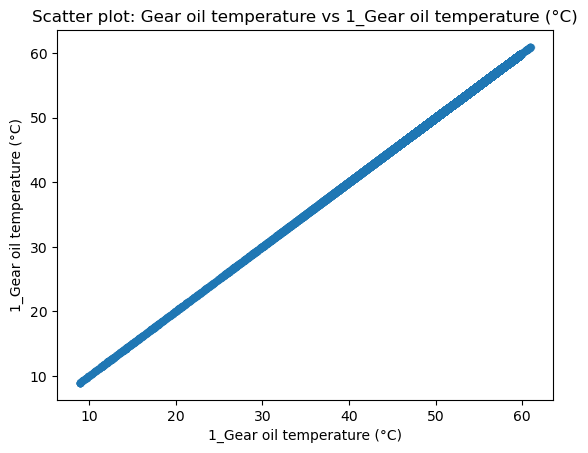

In [18]:
# Scatter plots of the target variable with respect to all other variables
for col in train.columns:
    train.plot(kind='scatter', x=col, y='1_Gear oil temperature (°C)', alpha=0.5)
    plt.title(f'Scatter plot: Gear oil temperature vs {col}')
    plt.show()


In [19]:
X_train

,# Date and time,1_Wind speed (m/s),1_Wind direction (°),1_Nacelle position (°),1_Power (kW),1_Reactive power (kvar),1_Front bearing temperature (°C),1_Rear bearing temperature (°C),1_Stator temperature 1 (°C),1_Nacelle ambient temperature (°C),...,1_Current L2 / V (A),1_Current L3 / W (A),1_Rotor speed (RPM),1_Generator RPM (RPM),1_Gearbox speed (RPM),1_Blade angle (pitch position) A (°),1_Blade angle (pitch position) B (°),1_Blade angle (pitch position) C (°),1_Yaw bearing angle (°),1_Apparent power (kVA)
0,2016-05-03 09:40:00,4.728757,276.818054,268.365997,353.803345,-167.806335,72.366669,70.616669,64.250000,10.883333,...,341.654999,332.929993,10.424160,1238.723389,1241.053345,0.000000,0.000000,0.000000,268.365997,399.346008
1,2016-05-03 09:50:00,6.427782,275.881958,268.365997,515.468567,-185.731003,73.110001,71.254997,62.160000,10.945000,...,469.053986,462.838013,11.664658,1383.924805,1387.244751,0.098996,0.099996,0.099996,268.365997,557.094421
2,2016-05-03 10:00:00,5.876329,270.699310,268.365997,403.398895,-125.460991,69.065002,67.224998,59.150002,11.195000,...,363.613495,354.046509,10.739404,1276.073975,1278.709961,0.000000,0.000000,0.000000,268.365997,427.895508
3,2016-05-03 10:10:00,5.676786,278.005402,268.365997,399.778290,-154.261169,70.830002,69.139999,58.740002,11.765000,...,366.775513,357.221985,10.676747,1268.375122,1270.797852,0.049000,0.050000,0.050000,268.365997,431.122009
4,2016-05-03 10:20:00,4.777902,284.922363,268.365997,206.619904,-108.576736,68.900002,67.629997,59.174999,11.865000,...,206.764999,196.437500,8.992739,1068.086426,1071.135010,0.000000,0.000000,0.000000,268.365997,235.981201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158726,2019-06-17 07:30:00,7.404013,205.687649,212.305334,801.821971,-371.104611,71.795000,68.585001,61.255000,16.810000,...,707.645250,700.865002,13.013371,1529.024471,1533.640955,0.000000,0.000000,0.000000,212.288271,893.025592
158727,2019-06-17 07:40:00,8.475867,214.209624,206.902130,1348.270200,-406.134328,74.840002,71.895000,64.584999,16.405000,...,1147.126505,1137.865747,14.868942,1762.308334,1768.210693,0.069498,0.070498,0.070998,206.902130,1411.979303
158728,2019-06-17 07:50:00,7.470652,204.538333,203.186624,859.228061,-343.284564,72.159999,68.515001,64.925000,16.375000,...,793.306247,784.582742,13.642314,1614.479221,1620.071165,0.030999,0.030000,0.028000,203.186624,932.059031
158729,2019-06-17 08:00:00,8.043064,207.656361,206.902130,1246.921840,-369.477640,73.754999,70.422500,63.750000,16.580000,...,1086.845749,1077.655014,14.608363,1731.562689,1737.130199,0.057997,0.059997,0.062496,206.902130,1283.418607


In [25]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

# downsample
X_train_new = X_train.iloc[::10, :]

X_train_new['id'] = 1

# fill nans linearly
X_train_new = X_train_new.interpolate(method='ffill')

# replace '# Date and time' with a column of 1...n
X_train_new['time'] = range(1, len(X_train_new) + 1)

# drop '# Date and time'
X_train_new.drop('# Date and time', axis=1, inplace=True)


# Extracting features
X_train_features = extract_features(X_train_new, column_id='id', column_sort='time', impute_function=impute)

/var/folders/wh/srwjqw_j5gsbl1y7xdb9jc900000gn/T/ipykernel_1980/1876620231.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new['id'] = 1
Feature Extraction: 100%|██████████| 16/16 [00:16<00:00,  1.03s/it]


In [26]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

# downsample
y_train_new = y_train.iloc[::10, :]

# drop index
y_train_new = y_train_new.drop(columns=['# Date and time'])

# impute(X_train_features)
features_filtered = select_features(X_train_features, y_train_new['1_Gear oil temperature (°C)'])

AssertionError: X and y must contain the same number of samples.

In [29]:
len(y_train_new)

15874

In [23]:
y_train

,# Date and time,1_Gear oil temperature (°C)
0,2016-05-03 09:40:00,58.750000
1,2016-05-03 09:50:00,59.270000
2,2016-05-03 10:00:00,56.470001
3,2016-05-03 10:10:00,57.730000
4,2016-05-03 10:20:00,57.830002
...,...,...
158726,2019-06-17 07:30:00,53.802500
158727,2019-06-17 07:40:00,54.872500
158728,2019-06-17 07:50:00,52.892500
158729,2019-06-17 08:00:00,54.285000


In [30]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [34]:
y

1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

In [35]:
timeseries.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


In [36]:
len(timeseries[timeseries['id'] == 3])

15

In [38]:
timeseries.id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88])

In [67]:
import pandas as pd
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_selection.selection import select_features
from sklearn.preprocessing import StandardScaler

# Load the data
X_train = pd.read_csv('data/single_turbine_data/X_train.csv', index_col='# Date and time', parse_dates=True)
y_train = pd.read_csv('data/single_turbine_data/y_train.csv', index_col='# Date and time', parse_dates=True)

# fill na
X_train = X_train.interpolate(method='ffill')
y_train = y_train.interpolate(method='ffill')

# downsample
X_train = X_train.iloc[::10, :]
y_train = y_train.iloc[::10, :]

# Merge X and y
# train = pd.merge(X_train, y_train, left_index=True, right_index=True)

# Melt the data
train_melt = X_train.reset_index().melt(id_vars='# Date and time', var_name='variable', value_name='value')

# Extract features
extracted_features = extract_features(train_melt, column_id='# Date and time', column_sort=None, column_kind='variable', column_value='value')

# Impute missing values
imputed_features = impute(extracted_features)

# Normalize the features
scaler = StandardScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(imputed_features), columns=imputed_features.columns)




Feature Extraction: 100%|██████████| 30/30 [24:00<00:00, 48.00s/it]  
/Users/johnny/anaconda3/envs/hacakthon/lib/python3.10/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['1_Ambient temperature (converter) (°C)__mean_abs_change'
 '1_Ambient temperature (converter) (°C)__mean_change'
 '1_Ambient temperature (converter) (°C)__mean_second_derivative_central'
 ... '1_Yaw bearing angle (°)__permutation_entropy__dimension_7__tau_1'
 '1_Yaw bearing angle (°)__query_similarity_count__query_None__threshold_0.0'
 '1_Yaw bearing angle (°)__mean_n_absolute_max__number_of_maxima_7'] did not have any finite values. Filling with zeros.
  warnings.warn(


In [68]:
y_train.reset_index(inplace=True)

# Perform feature selection
selected_features = select_features(normalized_features, y_train['1_Gear oil temperature (°C)'])

In [69]:
selected_features

,1_Rotor bearing temp (°C)__quantile__q_0.4,1_Nacelle temperature (°C)__quantile__q_0.7,1_Nacelle temperature (°C)__quantile__q_0.6,1_Nacelle temperature (°C)__quantile__q_0.3,1_Nacelle temperature (°C)__quantile__q_0.2,1_Nacelle temperature (°C)__quantile__q_0.1,1_Nacelle temperature (°C)__benford_correlation,1_Nacelle temperature (°C)__minimum,1_Nacelle temperature (°C)__absolute_maximum,1_Nacelle temperature (°C)__maximum,...,1_Voltage L1 / U (V)__root_mean_square,1_Voltage L1 / U (V)__mean,1_Voltage L1 / U (V)__quantile__q_0.6,1_Voltage L1 / U (V)__median,1_Voltage L1 / U (V)__quantile__q_0.2,1_Voltage L1 / U (V)__abs_energy,1_Voltage L1 / U (V)__quantile__q_0.4,1_Voltage L1 / U (V)__sum_values,1_Voltage L1 / U (V)__quantile__q_0.1,1_Current L3 / W (A)__benford_correlation
0,-0.136759,-0.180668,-0.180668,-0.180668,-0.180668,-0.180668,-0.547340,-0.180668,-0.180668,-0.180668,...,0.322437,0.322437,0.322437,0.322437,0.322437,0.463668,0.322437,0.322437,0.322437,-0.453657
1,-0.241313,-0.025475,-0.025475,-0.025475,-0.025475,-0.025475,-0.547340,-0.025475,-0.025475,-0.025475,...,0.299240,0.299240,0.299240,0.299240,0.299240,0.429767,0.299240,0.299240,0.299240,0.028710
2,-0.149667,0.891305,0.891305,0.891305,0.891305,0.891305,-0.547340,0.891305,0.891305,0.891305,...,0.183309,0.183309,0.183309,0.183309,0.183309,0.260454,0.183309,0.183309,0.183309,-0.717968
3,-0.305853,0.547962,0.547962,0.547962,0.547962,0.547962,-0.547340,0.547962,0.547962,0.547962,...,-1.064705,-1.064705,-1.064705,-1.064705,-1.064705,-1.550510,-1.064705,-1.064705,-1.064705,1.206882
4,-0.534323,0.459879,0.459879,0.459879,0.459879,0.459879,-0.547340,0.459879,0.459879,0.459879,...,-0.099077,-0.099077,-0.099077,-0.099077,-0.099077,-0.151188,-0.099077,-0.099077,-0.099077,0.028710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15869,1.199210,-0.611944,-0.611944,-0.611944,-0.611944,-0.611944,1.338405,-0.611944,-0.611944,-0.611944,...,0.647076,0.647076,0.647076,0.647076,0.647076,0.938881,0.647076,0.647076,0.647076,1.206882
15870,1.130798,-0.622280,-0.622280,-0.622280,-0.622280,-0.622280,1.338405,-0.622280,-0.622280,-0.622280,...,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.006995,-0.000075,-0.000075,-0.000075,1.206882
15871,1.061095,0.491337,0.491337,0.491337,0.491337,0.491337,-0.547340,0.491337,0.491337,0.491337,...,-0.507958,-0.507958,-0.507958,-0.507958,-0.507958,-0.745278,-0.507958,-0.507958,-0.507958,-1.149461
15872,1.143706,-0.102772,-0.102772,-0.102772,-0.102772,-0.102772,-0.547340,-0.102772,-0.102772,-0.102772,...,0.114037,0.114037,0.114037,0.114037,0.114037,0.159372,0.114037,0.114037,0.114037,1.206882


In [70]:
from tsfresh.feature_selection.relevance import calculate_relevance_table

relevant_features = calculate_relevance_table(normalized_features, y_train['1_Gear oil temperature (°C)'], ml_task='regression')
relevant_features = relevant_features[relevant_features['relevant'] == True]


In [71]:
relevant_features

,feature,type,p_value,relevant
feature,,,,
1_Rotor bearing temp (°C)__quantile__q_0.4,1_Rotor bearing temp (°C)__quantile__q_0.4,real,0.000000,True
1_Nacelle temperature (°C)__quantile__q_0.7,1_Nacelle temperature (°C)__quantile__q_0.7,real,0.000000,True
1_Nacelle temperature (°C)__quantile__q_0.6,1_Nacelle temperature (°C)__quantile__q_0.6,real,0.000000,True
1_Nacelle temperature (°C)__quantile__q_0.3,1_Nacelle temperature (°C)__quantile__q_0.3,real,0.000000,True
1_Nacelle temperature (°C)__quantile__q_0.2,1_Nacelle temperature (°C)__quantile__q_0.2,real,0.000000,True
...,...,...,...,...
1_Voltage L1 / U (V)__abs_energy,1_Voltage L1 / U (V)__abs_energy,real,0.000096,True
1_Voltage L1 / U (V)__quantile__q_0.4,1_Voltage L1 / U (V)__quantile__q_0.4,real,0.000096,True
1_Voltage L1 / U (V)__sum_values,1_Voltage L1 / U (V)__sum_values,real,0.000096,True


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize a Random Forest model
rf = RandomForestRegressor()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Initialize the grid search
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1)

# Fit the grid search
grid_search.fit(selected_features, y_train['1_Gear oil temperature (°C)'])

# Get the best model
best_rf = grid_search.best_estimator_

# Get feature importances
importances = best_rf.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]

# Get the names of the top 15 features
top_features = selected_features.columns[indices[:15]]


In [75]:
# Get the names of the top 15 features
top_features = selected_features.columns[indices[:300]]

In [76]:
# save top features list to txt file
with open('top_features_300.txt', 'w') as f:
    for feature in top_features:
        f.write(f'{feature}\n')

In [126]:
import featuretools as ft

# Assume you have a dataframe df with Date and time as index

# Create new entityset
es = ft.EntitySet(id='wind_data')

# Add the dataframe to the entityset
es = es.add_dataframe(dataframe_name='data_1',
                              dataframe=X_train,
                              index='# Date and time')


es = es.add_dataframe(dataframe=y_train,
                        dataframe_name='data_2',
                        index='# Date and time')


# features is a new dataframe with the original columns and the newly created features

# Run deep feature synthesis
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                        # relationships=relationships,
                                      target_dataframe_name='data_1',
                                      trans_primitives=['add_numeric', 'multiply_numeric', 'month', 'day', 'year', 'weekday', 'is_weekend'],
                                      agg_primitives=['mean', 'sum', 'mode', 'max', 'min', 'std', 'skew'],
                                      max_depth=3)

feature_matrix

/Users/johnny/anaconda3/envs/hacakthon/lib/python3.10/site-packages/featuretools/entityset/entityset.py:754: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(
/Users/johnny/anaconda3/envs/hacakthon/lib/python3.10/site-packages/featuretools/synthesis/dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['max', 'mean', 'min', 'mode', 'skew', 'std', 'sum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


,1_Wind speed (m/s),1_Wind direction (°),1_Nacelle position (°),1_Power (kW),1_Reactive power (kvar),1_Front bearing temperature (°C),1_Rear bearing temperature (°C),1_Stator temperature 1 (°C),1_Nacelle ambient temperature (°C),1_Nacelle temperature (°C),...,1_Voltage L2 / V (V) * 1_Wind speed (m/s),1_Voltage L2 / V (V) * 1_Yaw bearing angle (°),1_Voltage L3 / W (V) * 1_Wind direction (°),1_Voltage L3 / W (V) * 1_Wind speed (m/s),1_Voltage L3 / W (V) * 1_Yaw bearing angle (°),1_Wind direction (°) * 1_Wind speed (m/s),1_Wind direction (°) * 1_Yaw bearing angle (°),1_Wind speed (m/s) * 1_Yaw bearing angle (°),WEEKDAY(# Date and time),YEAR(# Date and time)
# Date and time,,,,,,,,,,,,,,,,,,,,,
2016-05-03 09:40:00,4.728757,276.818054,268.365997,353.803345,-167.806335,72.366669,70.616669,64.250000,10.883333,20.616667,...,1908.258332,108297.309546,111592.835655,1906.289652,108185.583199,1309.005285,74288.553190,1269.037563,1,2016
2016-05-03 11:20:00,5.555031,279.428925,275.974274,314.388458,-110.911369,68.250000,68.135002,63.904999,11.995000,21.480000,...,2241.173354,111310.455645,112631.482323,2239.107340,111207.844659,1552.236289,77093.602886,1532.616357,1,2016
2016-05-03 13:00:00,6.576325,265.278748,271.657990,520.162598,-170.728104,73.349998,71.779999,64.480003,12.060000,26.580000,...,2648.480003,109404.684161,106766.235923,2646.761064,109333.677365,1744.559244,72065.091219,1786.511211,1,2016
2016-05-03 14:40:00,4.045463,231.980743,245.317001,70.746277,-99.414932,59.150002,60.805000,61.224998,13.600000,24.670000,...,1611.740864,97736.013728,92337.270193,1610.250112,97645.614473,938.469534,56908.820342,992.420873,1,2016
2016-05-03 16:20:00,4.315720,268.910553,262.986725,163.489273,-243.511902,56.939999,58.525002,57.430000,13.800000,24.180000,...,1733.660633,105643.953579,108013.863468,1733.504299,105634.427052,1160.542674,70719.905606,1134.977090,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-17 01:30:00,8.338356,204.115408,202.451311,1261.293030,-401.637662,71.832500,67.480000,62.790000,14.000000,18.217500,...,3372.198006,81871.347048,82539.290373,3371.827770,81862.358337,1701.986978,41321.407086,1688.028420,0,2019
2019-06-17 03:10:00,8.904939,198.356321,202.511871,1389.239172,-436.779945,71.947501,67.957500,63.032500,13.900000,18.160001,...,3579.241124,81397.389067,79716.182649,3578.750467,81386.230767,1766.351022,40169.509780,1803.355945,0,2019
2019-06-17 04:50:00,8.025560,197.633262,202.511871,1030.757465,-322.328429,74.805000,70.962501,63.092501,15.665000,24.355000,...,3212.723433,81067.821515,79050.123007,3210.094639,81001.488185,1586.117527,40023.081733,1625.271096,0,2019


In [130]:
normalized_feature_matrix = pd.DataFrame(scaler.fit_transform(feature_matrix), columns=feature_matrix.columns)

In [77]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define the method
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)

# Fit to the data and transform
X_rfe = rfe.fit_transform(selected_features, y_train['1_Gear oil temperature (°C)'])

# Get the features selected
selected_features_rfe = selected_features.columns[rfe.support_]
print(selected_features_rfe)

Index(['1_Voltage L3 / W (V)__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)',
       '1_Voltage L3 / W (V)__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       '1_Voltage L3 / W (V)__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)',
       '1_Voltage L3 / W (V)__root_mean_square',
       '1_Voltage L3 / W (V)__median', '1_Voltage L3 / W (V)__mean',
       '1_Voltage L2 / V (V)__quantile__q_0.3',
       '1_Voltage L2 / V (V)__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)',
       '1_Voltage L2 / V (V)__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       '1_Voltage L1 / U (V)__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)',
       '1_Voltage L1 / U (V)__quantile__q_0.9',
       '1_Voltage L1 / U (V)__quantile__q_0.3',
       '1_Voltage L1 / U (V)__absolute_maximum',
       '1_Voltage L1 / U (V)__maximum',
       '1_Voltage L1 / U (V)__root_mean_square'],
      dtype='object')


In [109]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV(cv=5)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.1)
sfm.fit(selected_features, y_train['1_Gear oil temperature (°C)'])

# Get the features selected
selected_features_lasso = selected_features.columns[sfm.get_support()]
print(selected_features_lasso)

Index(['1_Rotor bearing temp (°C)__quantile__q_0.4',
       '1_Blade angle (pitch position) B (°)__range_count__max_1__min_-1',
       '1_Blade angle (pitch position) A (°)__range_count__max_1__min_-1',
       '1_Rear bearing temperature (°C)__mean',
       '1_Rear bearing temperature (°C)__abs_energy',
       '1_Rotor bearing temp (°C)__quantile__q_0.6',
       '1_Generator bearing rear temperature (°C)__sum_values',
       '1_Generator bearing rear temperature (°C)__abs_energy',
       '1_Generator bearing rear temperature (°C)__median',
       '1_Generator bearing front temperature (°C)__abs_energy',
       '1_Nacelle temperature (°C)__quantile__q_0.4',
       '1_Rotor bearing temp (°C)__abs_energy',
       '1_Reactive power (kvar)__range_count__max_1__min_-1',
       '1_Hub temperature (°C)__quantile__q_0.3',
       '1_Front bearing temperature (°C)__abs_energy',
       '1_Generator RPM (RPM)__benford_correlation',
       '1_Ambient temperature (converter) (°C)__sum_values',
      

/Users/johnny/anaconda3/envs/hacakthon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+03, tolerance: 4.929e+01
  model = cd_fast.enet_coordinate_descent(


In [131]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV(cv=5)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(normalized_feature_matrix, y_train['1_Gear oil temperature (°C)'])

# Get the features selected
selected_features_lasso_ft = normalized_feature_matrix.columns[sfm.get_support()]
print(selected_features_lasso_ft)

/Users/johnny/anaconda3/envs/hacakthon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.07660071220744, tolerance: 38.37810579890755
  model = cd_fast.enet_coordinate_descent_gram(
/Users/johnny/anaconda3/envs/hacakthon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.16066679507094, tolerance: 38.37810579890755
  model = cd_fast.enet_coordinate_descent_gram(
/Users/johnny/anaconda3/envs/hacakthon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.98617836298945, tolerance: 38.37810579890755
  model = cd_fast.enet_coordinate_descent_gram(
/Users/johnny/anaco

Index(['1_Rear bearing temperature (°C)', '1_Rotor bearing temp (°C)',
       '1_Rotor speed (RPM)', '1_Generator RPM (RPM)',
       '1_Blade angle (pitch position) A (°) + 1_Rear bearing temperature (°C)',
       '1_Generator bearing front temperature (°C) + 1_Rear bearing temperature (°C)',
       '1_Generator bearing rear temperature (°C) + 1_Rear bearing temperature (°C)',
       '1_Rear bearing temperature (°C) + 1_Rotor bearing temp (°C)',
       '1_Rear bearing temperature (°C) + 1_Temp. top box (°C)',
       '1_Rotor speed (RPM) + 1_Wind speed (m/s)',
       '1_Blade angle (pitch position) A (°) * 1_Generator bearing front temperature (°C)',
       '1_Blade angle (pitch position) A (°) * 1_Rear bearing temperature (°C)',
       '1_Blade angle (pitch position) B (°) * 1_Rear bearing temperature (°C)',
       '1_Blade angle (pitch position) C (°) * 1_Generator bearing front temperature (°C)',
       '1_Blade angle (pitch position) C (°) * 1_Rear bearing temperature (°C)',
       

/Users/johnny/anaconda3/envs/hacakthon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.345e+02, tolerance: 4.929e+01
  model = cd_fast.enet_coordinate_descent(


In [144]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


features = selected_features_lasso.append(selected_features_lasso).unique()
# features = selected_features_lasso_ft

iterations = 50000
learning_rate = 0.01
depth = 12

full_data = pd.concat([normalized_feature_matrix, selected_features], axis=1)
# full_data = normalized_feature_matrix


# Split the data into train and validation sets
X_train_selected, X_val_selected, y_train_selected, y_val_selected = train_test_split(
    full_data[features],
    y_train['1_Gear oil temperature (°C)'],
    test_size=0.2,
    random_state=42
)

# Initialize CatBoostRegressor
model = CatBoostRegressor(
    iterations=iterations,
    learning_rate=learning_rate,
    depth=depth,
    loss_function='RMSE',
    random_seed=42,
    verbose=100  # Output every 100th iteration
)

# Fit model
model.fit(
    X_train_selected, 
    y_train_selected,
    eval_set=(X_val_selected, y_val_selected),
    use_best_model=True
)

# Make predictions on the training set and calculate RMSE
y_train_pred = model.predict(X_train_selected)
rmse_train = np.sqrt(mean_squared_error(y_train_selected, y_train_pred))
print(f'Train RMSE: {rmse_train}')
y_test_pred = model.predict(X_val_selected)
rmse_val = np.sqrt(mean_squared_error(y_val_selected, y_test_pred))
print(f'Validation RMSE: {rmse_val}')

import pandas as pd
from pathlib import Path

# Define a path to the results file
results_file = Path('results.csv')

# Create a DataFrame to hold the results
results_df = pd.DataFrame(
    {
        'Model': ['CatBoost'],
        'Training RMSE': [rmse_train],
        'Validation RMSE': [rmse_val],
        'Iterations': [iterations],
        'Learning Rate': [learning_rate],
        'Depth': [depth],
        'Loss Function': ['RMSE'],
        'Features': [features],
    }
)

# If the results file exists, load it and append the new results
if results_file.exists():
    existing_df = pd.read_csv(results_file)
    results_df = pd.concat([existing_df, results_df])

# Save the results DataFrame to CSV
results_df.to_csv(results_file, index=False)

0:	learn: 5.5189641	test: 5.5548168	best: 5.5548168 (0)	total: 26.3ms	remaining: 21m 54s
100:	learn: 2.5135727	test: 2.5870382	best: 2.5870382 (100)	total: 2.5s	remaining: 20m 36s
200:	learn: 1.3771315	test: 1.4943158	best: 1.4943158 (200)	total: 4.96s	remaining: 20m 29s
300:	learn: 0.9645742	test: 1.1223969	best: 1.1223969 (300)	total: 7.42s	remaining: 20m 24s
400:	learn: 0.8085524	test: 0.9897782	best: 0.9897782 (400)	total: 9.89s	remaining: 20m 23s
500:	learn: 0.7279471	test: 0.9270631	best: 0.9270631 (500)	total: 12.3s	remaining: 20m 19s
600:	learn: 0.6752059	test: 0.8890467	best: 0.8890467 (600)	total: 14.8s	remaining: 20m 18s
700:	learn: 0.6344568	test: 0.8613811	best: 0.8613811 (700)	total: 17.3s	remaining: 20m 16s
800:	learn: 0.6022825	test: 0.8420221	best: 0.8420221 (800)	total: 19.8s	remaining: 20m 14s
900:	learn: 0.5753758	test: 0.8268068	best: 0.8268068 (900)	total: 22.3s	remaining: 20m 12s
1000:	learn: 0.5512553	test: 0.8143909	best: 0.8143909 (1000)	total: 24.7s	remaining

In [139]:
hyperparameters = pd.read_csv('results.csv')

In [140]:
hyperparameters

,Model,Training RMSE,Validation RMSE,Iterations,Learning Rate,Depth,Loss Function,Features
0,CatBoost,0.302691,0.601346,1000,0.1,6,RMSE,NaN
1,CatBoost,0.384743,0.688070,1000,0.1,6,RMSE,Index(['1_Rotor bearing temp (°C)__quantile__q...
2,CatBoost,0.384743,0.688070,1000,0.1,6,RMSE,Index(['1_Voltage L3 / W (V)__cwt_coefficients...
3,CatBoost,0.384743,0.688070,1000,0.1,6,RMSE,Index(['1_Voltage L3 / W (V)__cwt_coefficients...
4,CatBoost,0.252760,0.677292,5000,0.1,6,RMSE,Index(['1_Voltage L3 / W (V)__cwt_coefficients...
5,CatBoost,0.252760,0.677292,5000,0.1,6,RMSE,Index(['1_Voltage L3 / W (V)__cwt_coefficients...
6,CatBoost,5.215661,5.493535,5000,0.1,6,RMSE,Index(['1_Voltage L3 / W (V)__cwt_coefficients...
7,CatBoost,0.202164,0.679975,5000,0.1,6,RMSE,Index(['1_Voltage L3 / W (V)__cwt_coefficients...
8,CatBoost,0.071785,0.583140,5000,0.1,6,RMSE,Index(['1_Voltage L3 / W (V)__cwt_coefficients...
9,CatBoost,0.364112,0.737517,5000,0.1,6,RMSE,Index(['1_Rotor bearing temp (°C)__quantile__q...
